In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [2]:
df=pd.read_excel('stringaprobo.xlsx')

In [3]:
df1=df.drop(columns=['carrera','legajo','cantidad_idiomas'])

In [4]:
inputs = pd.get_dummies(df1, columns=['nombre_carrera', 'ingreso', 'sexo', 'pais_procedencia',
       'prov_procedencia', 'edad', 'estado_civil', 'cant_hijos', 'vive_con',
       'tiene_beca', 'aporte_familiar', 'obra_social', 'trabajo', 'padre_vive',
       'padre_ult_est_curs', 'padre_trabajo', 'madre_vive',
       'madre_ult_est_curs', 'madre_trabajo', 'dep_practica', 'idioma_ingles',
       'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman'])


In [5]:
target=np.array(inputs['fechaapro_matematica_al_21-10-2017'])
inputs=inputs.drop(columns=['matcursprisem','fechaapro_matematica_al_21-10-2017', 
                            'cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017', 
                            'promedio_sin_aplaz_al_21-10-2017'])

In [6]:
inputs_list=list(inputs.columns)
inputs=np.array(inputs)

In [7]:
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [8]:
print('Training Features Shape:', train_inputs.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_inputs.shape)
print('Testing Labels Shape:', test_target.shape)

Training Features Shape: (1896, 132)
Training Labels Shape: (1896,)
Testing Features Shape: (474, 132)
Testing Labels Shape: (474,)


In [9]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(train_inputs, train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = classifier.predict(test_inputs)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target, y_pred)
cm

array([[276,  37],
       [ 80,  81]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target, y_pred)

In [13]:
accuracy

0.7531645569620253

In [14]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000], 'kernel':['linear']},
           {'C':[1,10,100,1000], 'kernel':['rbf'], 'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search= GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search= grid_search.fit(train_inputs, train_target)

In [15]:
accuracy= grid_search.best_score_

In [16]:
accuracy

0.7246835443037974

In [17]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [18]:
predictions = grid_search.predict(test_inputs)

In [19]:
accuracy_score(test_target, predictions)

0.7552742616033755

In [20]:
cm=confusion_matrix(test_target, predictions)
cm

array([[272,  41],
       [ 75,  86]], dtype=int64)

Text(24.0, 0.5, 'Target')

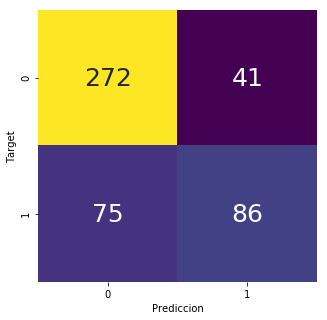

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True, 
           yticklabels=True,
           cmap="viridis", 
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

In [25]:
tp, fp, fn, tn = confusion_matrix(test_target , predictions).ravel()
print("Number of true positives  (tp) = ",tp)
print("Number of true negatives  (tn) = ",tn)

print("Number of false positives (fp) = ",fp)
print("Number of false negatives (fn) = ",fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true positives  (tp) =  272
Number of true negatives  (tn) =  86
Number of false positives (fp) =  41
Number of false negatives (fn) =  75
Precision                                          = tp / (tp + fp) = 0.8690095846645367
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.7838616714697406
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.6771653543307087
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.3228346456692913
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.21613832853025935


AUC =  0.7015855376738832


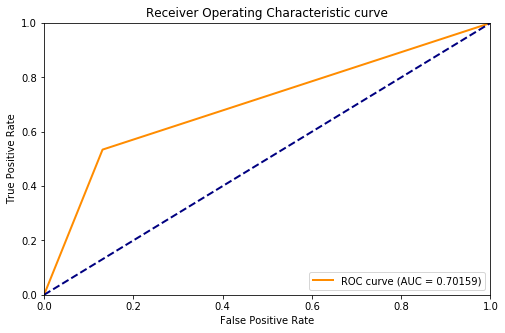

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target , predictions)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target , predictions)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import f1_score
f1_score(test_target , predictions)

0.5972222222222222